In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [38]:
df1 = pd.read_csv("MD_COVID-19_-_Testing_Volume.csv")
df2 = pd.read_csv("MD_COVID-19_-_Total_Hospitalizations.csv")
print(df1.info())
print(df2.info())
print(df1.head(20))
print(df2.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OBJECTID             257 non-null    int64  
 1   date                 257 non-null    object 
 2   number_of_tests      257 non-null    int64  
 3   number_of_positives  257 non-null    int64  
 4   percent_positive     257 non-null    float64
 5   rolling_avg          251 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 12.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OBJECTID  268 non-null    int64  
 1   DATE      268 non-null    object 
 2   Count     266 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ KB
None
    OBJECTID                    date  number_of_tests  number_

In [39]:
def removeTime(x):
    x = x[:10]
    return x

df1["date"] = df1["date"].apply(removeTime)
df2["date"] = df2["DATE"].apply(removeTime)
df2 = df2.drop(["DATE","OBJECTID"], axis = 1)
df1 = df1.drop(["OBJECTID"], axis = 1)
print(df1.head())
print(df2.head())

         date  number_of_tests  number_of_positives  percent_positive  \
0  03/23/2020              955                   77              8.06   
1  03/24/2020             1120                   84              7.50   
2  03/25/2020             3340                  401             12.01   
3  03/26/2020             1820                  206             11.32   
4  03/27/2020             3075                  348             11.32   

   rolling_avg  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
   Count        date
0    2.0  03/13/2020
1    3.0  03/14/2020
2    NaN  03/15/2020
3    4.0  03/16/2020
4    NaN  03/17/2020


In [58]:
df3 = df1.merge(df2,on="date")
df3 = df3.dropna()
df3["date"] = pd.to_datetime(df3["date"])
df3["month"] = pd.DatetimeIndex(df3["date"]).month
df3['rolling_10_num_pos'] = df3.iloc[:,2].rolling(window=10).mean()
df3.rename(columns = {"rolling_avg":"rolling_7_per_pos"}, inplace = True)
df3["month"] = df3.month.astype('category')
df3 = df3.dropna()
print(df3.info())
df3.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 15 to 256
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 242 non-null    datetime64[ns]
 1   number_of_tests      242 non-null    int64         
 2   number_of_positives  242 non-null    int64         
 3   percent_positive     242 non-null    float64       
 4   rolling_7_per_pos    242 non-null    float64       
 5   Count                242 non-null    float64       
 6   month                242 non-null    category      
 7   rolling_10_num_pos   242 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 15.8 KB
None


,date,number_of_tests,number_of_positives,percent_positive,rolling_7_per_pos,Count,month,rolling_10_num_pos
15,2020-04-07,7936,1600,20.16,19.65,1106.0,4,567.9
16,2020-04-08,3155,684,21.68,20.21,1210.0,4,612.0
17,2020-04-09,3927,935,23.81,20.99,1348.0,4,673.1
18,2020-04-10,3628,870,23.98,21.91,1413.0,4,710.7
19,2020-04-11,2176,534,24.54,22.82,1709.0,4,719.1
20,2020-04-12,3805,967,25.41,23.05,1860.0,4,760.2
21,2020-04-13,1585,428,27.00,23.80,1975.0,4,756.9
22,2020-04-14,2410,708,29.38,25.11,2122.0,4,765.8
23,2020-04-15,3582,1057,29.51,26.23,2231.0,4,808.9
24,2020-04-16,3441,908,26.39,26.60,2451.0,4,869.1


In [60]:
df3.describe()

,number_of_tests,number_of_positives,percent_positive,rolling_7_per_pos,Count,rolling_10_num_pos
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,18998.665289,1028.053719,8.020537,8.174215,12259.413223,977.032231
std,11380.418101,653.339460,7.235438,7.251130,4889.532649,510.720090
min,1585.000000,368.000000,1.890000,2.510000,1106.000000,465.900000
25%,9181.500000,633.250000,3.450000,3.420000,9474.750000,683.825000
50%,18029.500000,868.500000,4.720000,4.630000,12950.000000,816.900000
75%,27730.750000,1103.750000,8.070000,7.995000,15735.000000,1055.150000
max,55939.000000,4628.000000,29.510000,26.880000,21756.000000,2932.900000


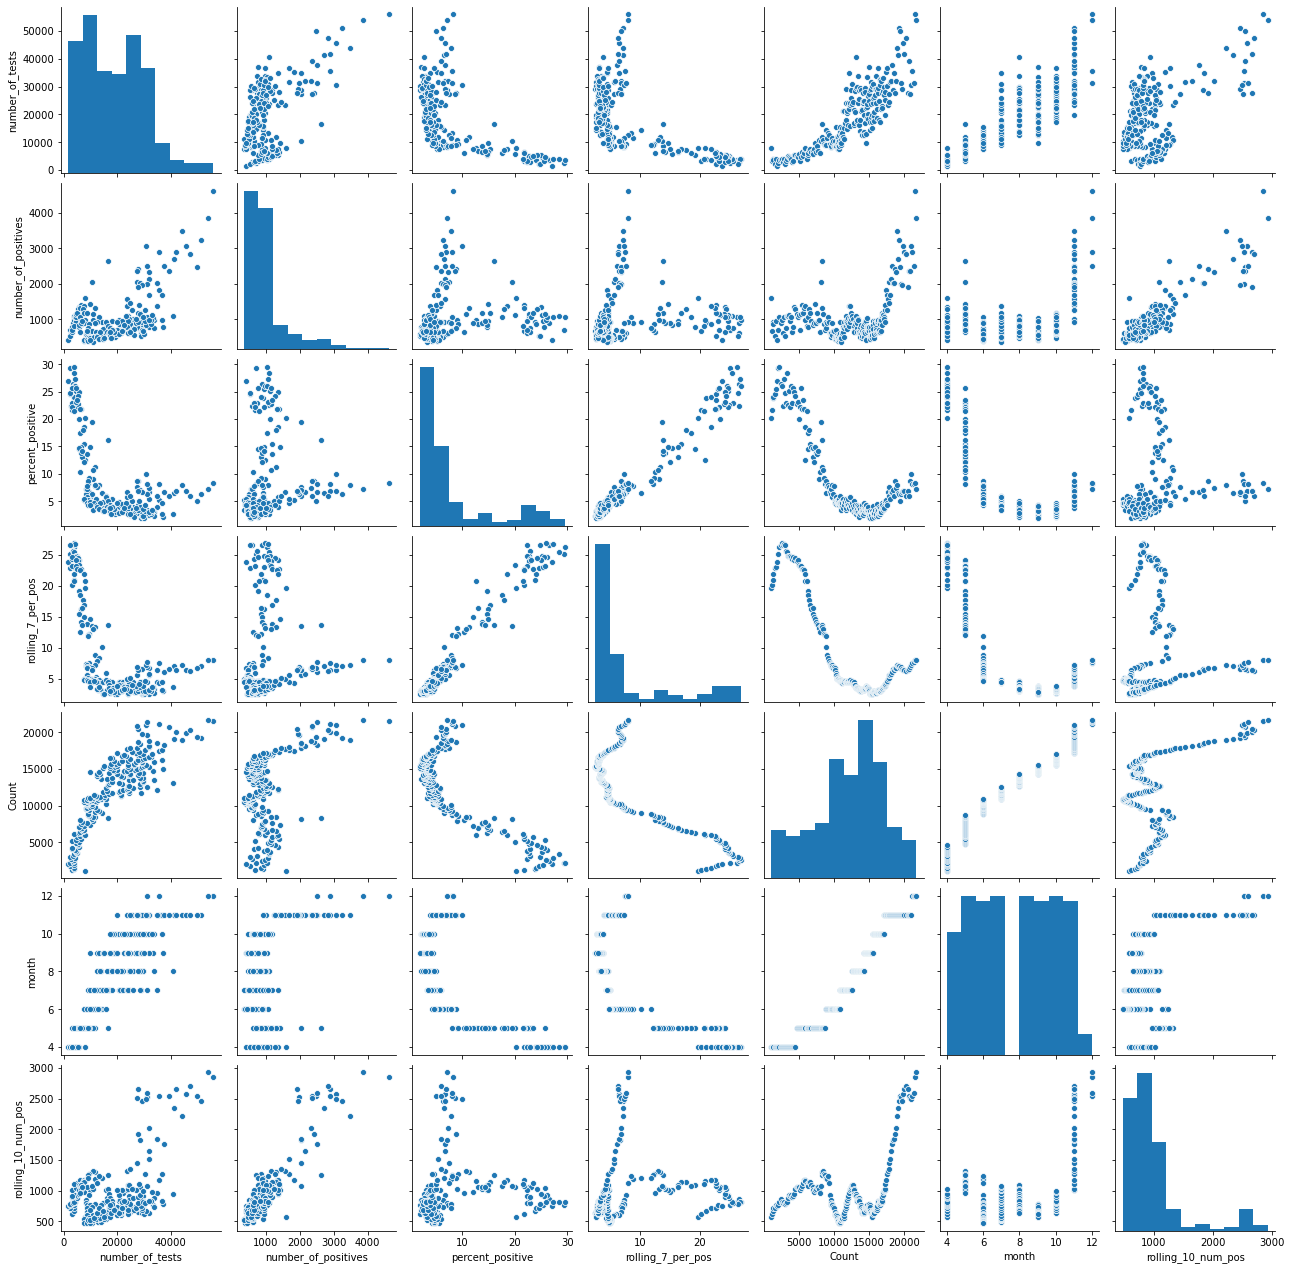

In [59]:
sns.pairplot(df3)

In [156]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

In [100]:
X = np.array(df3.iloc[:,[1,2,3,4,6,7]])
y = np.array(df3.iloc[:,5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [150]:
# Model Parameters to test
model_params = {
"KNN" : {"model__n_neighbors":(2,3,4,5,6,7,8,9,10,11,12,13,14,15),
                "model__weights":("uniform","distance")
             },
"LR" : {},
"Ridge": {"model__alpha":(.01,.1,.5,.8,1,1.2,1.5),
         },
"DT" : {"model__criterion":("mse", "friedman_mse", "mae"),
        "model__min_samples_split":(2,3,4,5),
        "model__min_samples_leaf" : (1,2,3,4,5),
        "model__min_weight_fraction_leaf" : (0,.1,.2,.3)
       },
"Lasso" : {"model__alpha":(1,.9,.8,.7,1.2,2,5,.1),
           "model__selection":("cyclic","random")
    },
"SVM" : {"model__loss":('epsilon_insensitive', 'squared_epsilon_insensitive'),
         "model__C": (.1,.5,.9,1,3,10)
        },
"MLP" : {"model__hidden_layer_sizes":((100,50),(50,50,50),(200,50,10),(20,20,20,20)),
         "model__alpha":(.0001,.001,.005,.0005),
         "model__learning_rate":("constant","invscaling","adaptive"),
         "model__momentum":(.99,.95,.9,)   
}
}

models = {
    "KNN" : KNeighborsRegressor(),
    "LR" : LinearRegression(),
    "Ridge" : Ridge(),
    "DT" : DecisionTreeRegressor(max_features="auto"),
    "Lasso" : Lasso(),
    "SVM" : LinearSVR(),
    "MLP" : MLPRegressor(max_iter=1000)
}


In [151]:
for model in models:
    pipe = Pipeline(steps = [("feature",PolynomialFeatures()),
                                 ("scalar",StandardScaler()),("model",models[model])])
    pipe.get_params().keys()
    grid = GridSearchCV(estimator=pipe, param_grid=model_params[model],n_jobs=-1)
    grid_result = grid.fit(X_train, y_train)
    print(model)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)
    print("\n")

KNN
Best Score:  0.9855340527713226
Best Params:  {'model__n_neighbors': 5, 'model__weights': 'distance'}


LR
Best Score:  0.988915739822948
Best Params:  {}


Ridge
Best Score:  0.9934137400528215
Best Params:  {'model__alpha': 0.01}


DT
Best Score:  0.9926044193020894
Best Params:  {'model__criterion': 'mae', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__min_weight_fraction_leaf': 0}


Lasso
Best Score:  0.9928971889453067
Best Params:  {'model__alpha': 0.1, 'model__selection': 'random'}




C:\Users\pixto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11784996.856159538, tolerance: 480244.0928435233
  model = cd_fast.enet_coordinate_descent(
C:\Users\pixto\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVM
Best Score:  0.9925245452564875
Best Params:  {'model__C': 3, 'model__loss': 'squared_epsilon_insensitive'}


MLP
Best Score:  0.9764692085205683
Best Params:  {'model__alpha': 0.005, 'model__hidden_layer_sizes': (50, 50, 50), 'model__learning_rate': 'invscaling', 'model__momentum': 0.99}




C:\Users\pixto\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [165]:
ridge_pipe = Pipeline(steps = [("feature",PolynomialFeatures()),
                                 ("scalar",StandardScaler()),("model",Ridge(alpha=.01))])
ridge_pipe.fit(X_train,y_train)
preds = ridge_pipe.predict(X_test)
print("Ridge Regression Test score: ",ridge_pipe.score(X_test,y_test))
print("Ridge Regression Train score: ",ridge_pipe.score(X_train,y_train))
print("Ridge Regression Mean Absolute Error: ",np.mean(abs(preds-y_test)))

Ridge Regression Test score:  0.9924845365720517
Ridge Regression Train score:  0.9950528730930718
Ridge Regression Mean Absolute Error:  312.9920717257693


In [166]:
(12259 - 312) / 12259

0.9745493107104984